# 1.DATA LOADING AND EXPLORATION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Sarat\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv("Recruitment_Data.csv")

In [3]:
data.shape

(446, 4)

In [4]:
data.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online


In [5]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attrition           446 non-null    int64  
 1   performance_rating  446 non-null    int64  
 2   sales_quota_pct     446 non-null    float64
 3   recruiting_source   241 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 14.1+ KB


In [6]:
# calculating the percentage of null values 
((data.isnull().sum()/len(data.index)).round(4))*100

attrition              0.00
performance_rating     0.00
sales_quota_pct        0.00
recruiting_source     45.96
dtype: float64

In [7]:
# Above we can see that recruiting source is having 45.96 persentage of missing values, hence we need to replace these missing values 

In [8]:
# Checking the unique values in Recruiting source and their value count 
data['recruiting_source'].value_counts()

recruiting_source
Applied Online    130
Campus             56
Referral           45
Search Firm        10
Name: count, dtype: int64

In [9]:
# given that the presedntage of missing values is high and the value counts of unique values does not have any outlineer point.
# so we cannot replace this data set with any of the unique values as that might affect our analysics.
# so we have to remove the rows that contain this null values.

In [10]:
data.dropna(inplace=True)

In [11]:
data.shape

(241, 4)

In [12]:
data.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
2,1,2,0.497530,Campus
4,0,3,1.424789,Applied Online
5,1,3,0.548123,Referral
6,1,3,0.794213,Applied Online


In [13]:
# Now the rows have null values have been removed.

In [14]:
data.groupby(by='recruiting_source')[['attrition','sales_quota_pct']].mean()

,attrition,sales_quota_pct
recruiting_source,,
Applied Online,0.246154,1.058590
Campus,0.285714,0.908035
Referral,0.333333,1.023198
Search Firm,0.500000,0.886960


The following conclusions can be made based on the computation above:
                
                1. Those hired through online applications have the greatest sales volume and the lowest attrition
                rate,indicating that those hired online have the best likelihood of sticking with the company.  
                2. Despite having the second-highest sales volume, applicants acquired through referrals have the 
                second-highest attrition rate, which increases the likelihood of them quitting the organization.
                3. The prospects hired through Search Frim are not the best candidates to hire because they have the lowest 
                retention rate and the lowest sales volume.
                

# 2. EDA

## 2.1 Visualization using ggplot

In [15]:
pip install plotnine

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
from plotnine import *

In [47]:
data1=data.groupby(by='recruiting_source')[['attrition','sales_quota_pct']].mean().reset_index()

In [48]:
data1

,recruiting_source,attrition,sales_quota_pct
0,Applied Online,0.246154,1.058590
1,Campus,0.285714,0.908035
2,Referral,0.333333,1.023198
3,Search Firm,0.500000,0.886960


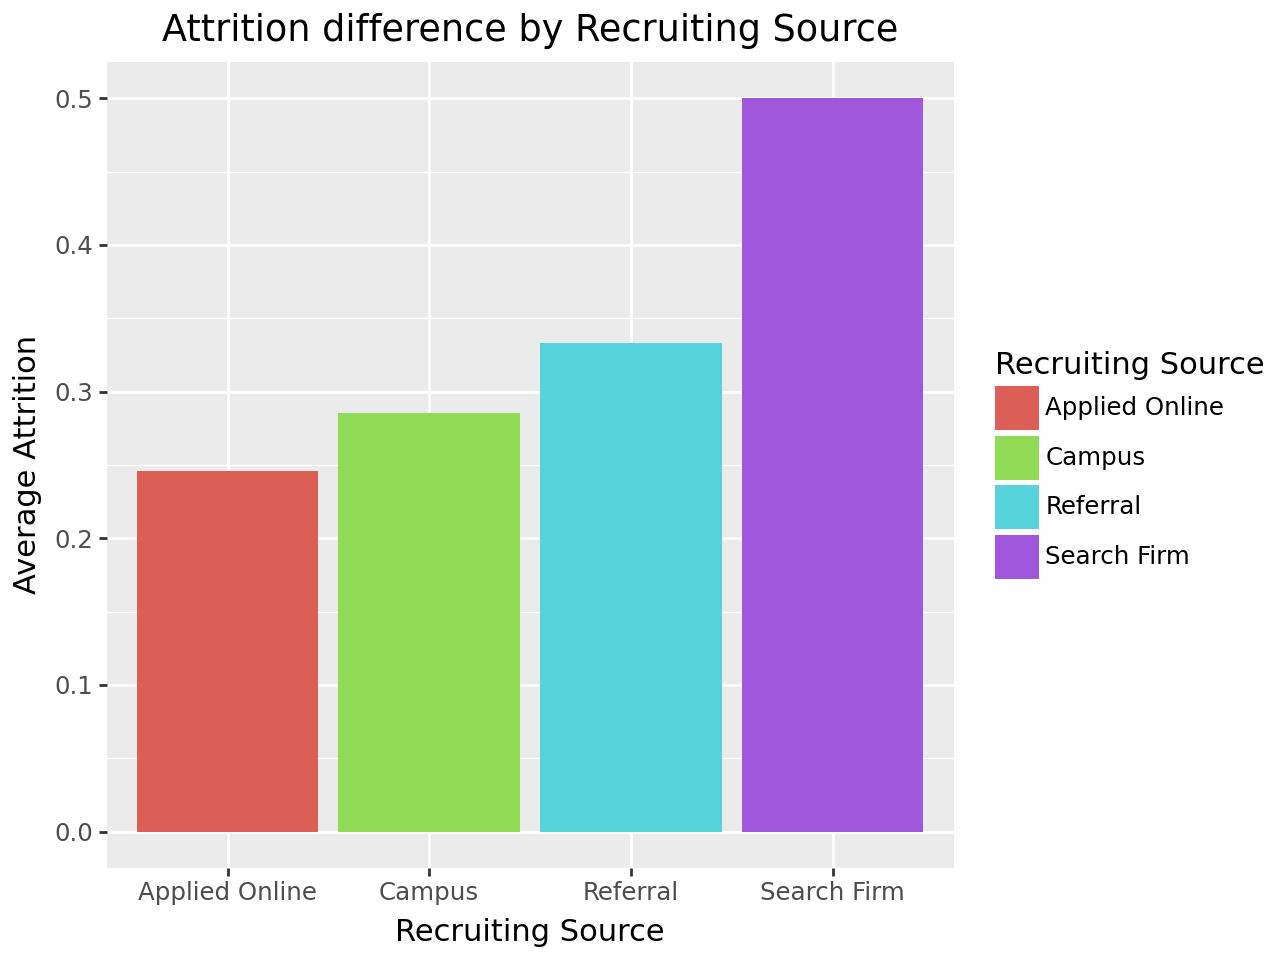

In [49]:
plot=(
    ggplot(data1)
    + aes(x='recruiting_source', y='attrition',fill='recruiting_source')
    + geom_bar(stat='identity')
    + labs(title='Attrition difference by Recruiting Source',
         x='Recruiting Source',
         y='Average Attrition',
         fill='Recruiting Source')

)
plot.draw()
plot.show()

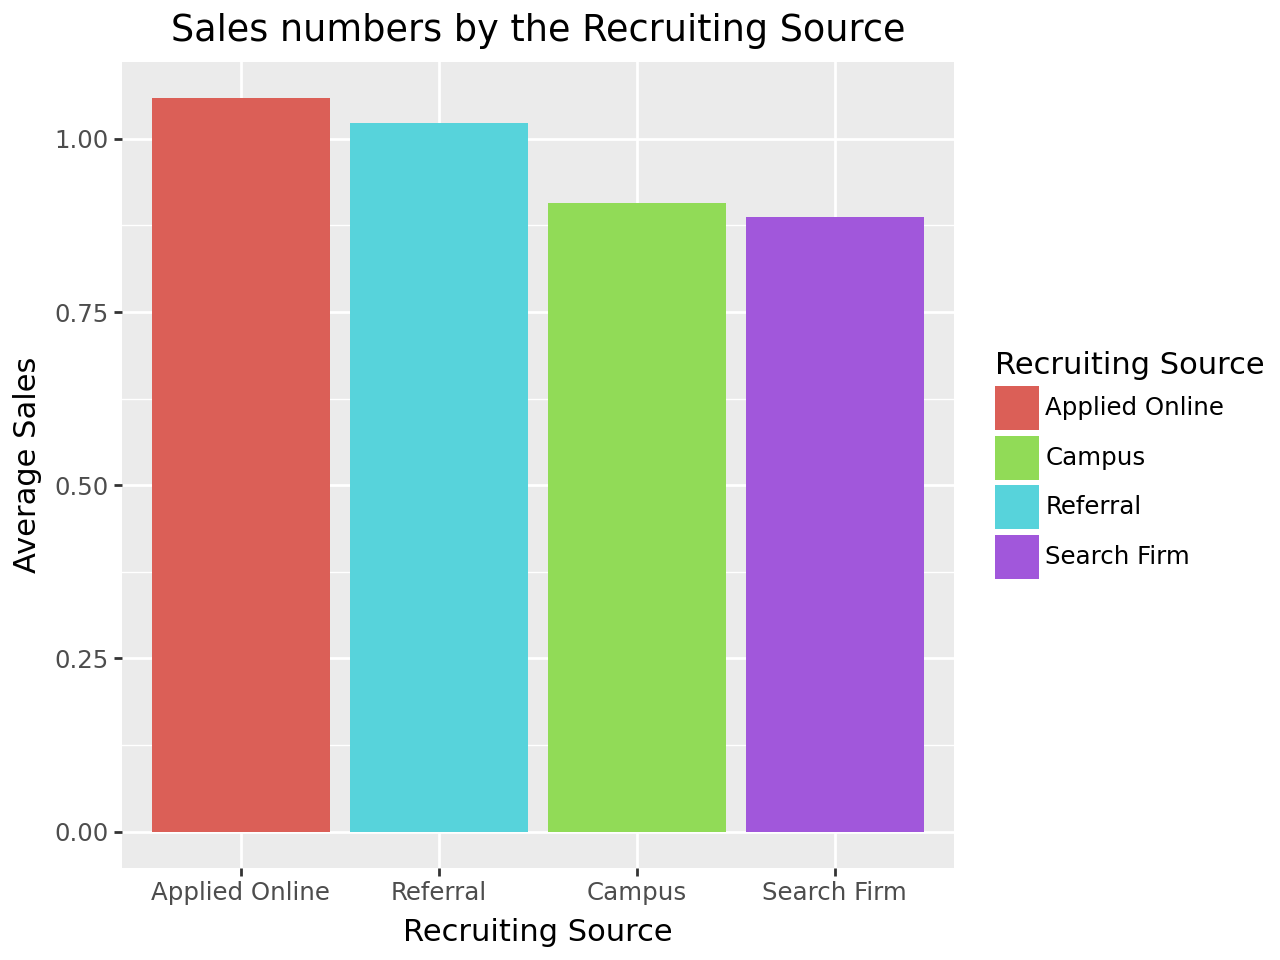

In [50]:
plot2=(
    ggplot(data1)
    + aes(x='reorder(recruiting_source, -sales_quota_pct)', y='sales_quota_pct',fill='recruiting_source')
    + geom_bar(stat='identity')
    + labs(title='Sales numbers by the Recruiting Source',
         x='Recruiting Source',
         y='Average Sales',
         fill='Recruiting Source')

)
plot2.draw()
plot2.show()

Conclusions:

       1.Based on the aforementioned visualizations, campus and online recruitment are the most effective sources of  
       candidates.
       2.The greatest source for hiring is online recruitment because it has the highest average sales (above 1) 
       and the lowest average attrition rate (below 0.3). 
       3.The hiring process on campus Campus recruitment is the second best source of candidates even though it has lower 
       average sales (i.e.above 0.75 and less than 1) than Referral recruitment's average sales (i.e.above 1) and a lower 
       average attrition rate (i.e.below 0.3) than Refferal recruitment (i.e.above 0.3). 